# How to simulate Likert-scale data in R

To generate a sample of simulated Likert scale item responses in R we can use a simple function called `rLikert` from R package `responsesR`.

To install it from GitHub, we first need `devtools` package:

In [1]:
install.packages("devtools")
library(devtools)

Then, we can install it by using:

In [2]:
install_github("markolalovic/responsesR")
library(responsesR)

## Simulate unbiased responses

To generate a sample of size = 100 with the number of Likert scale items = 10:

In [3]:
responses <- rLikert(size = 100, items = 10)

The result is a data frame of simulated responses where rows correspond to observations and columns to Likert scale items:

In [4]:
head(responses)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,4,2,4,1,2,4,4,3,2
2,4,3,3,2,4,1,2,3,2,3
3,3,2,3,2,1,5,3,4,5,2
4,2,4,3,2,3,4,2,2,5,1
5,5,3,1,2,4,3,3,3,1,3
6,2,4,2,2,2,4,2,2,3,4


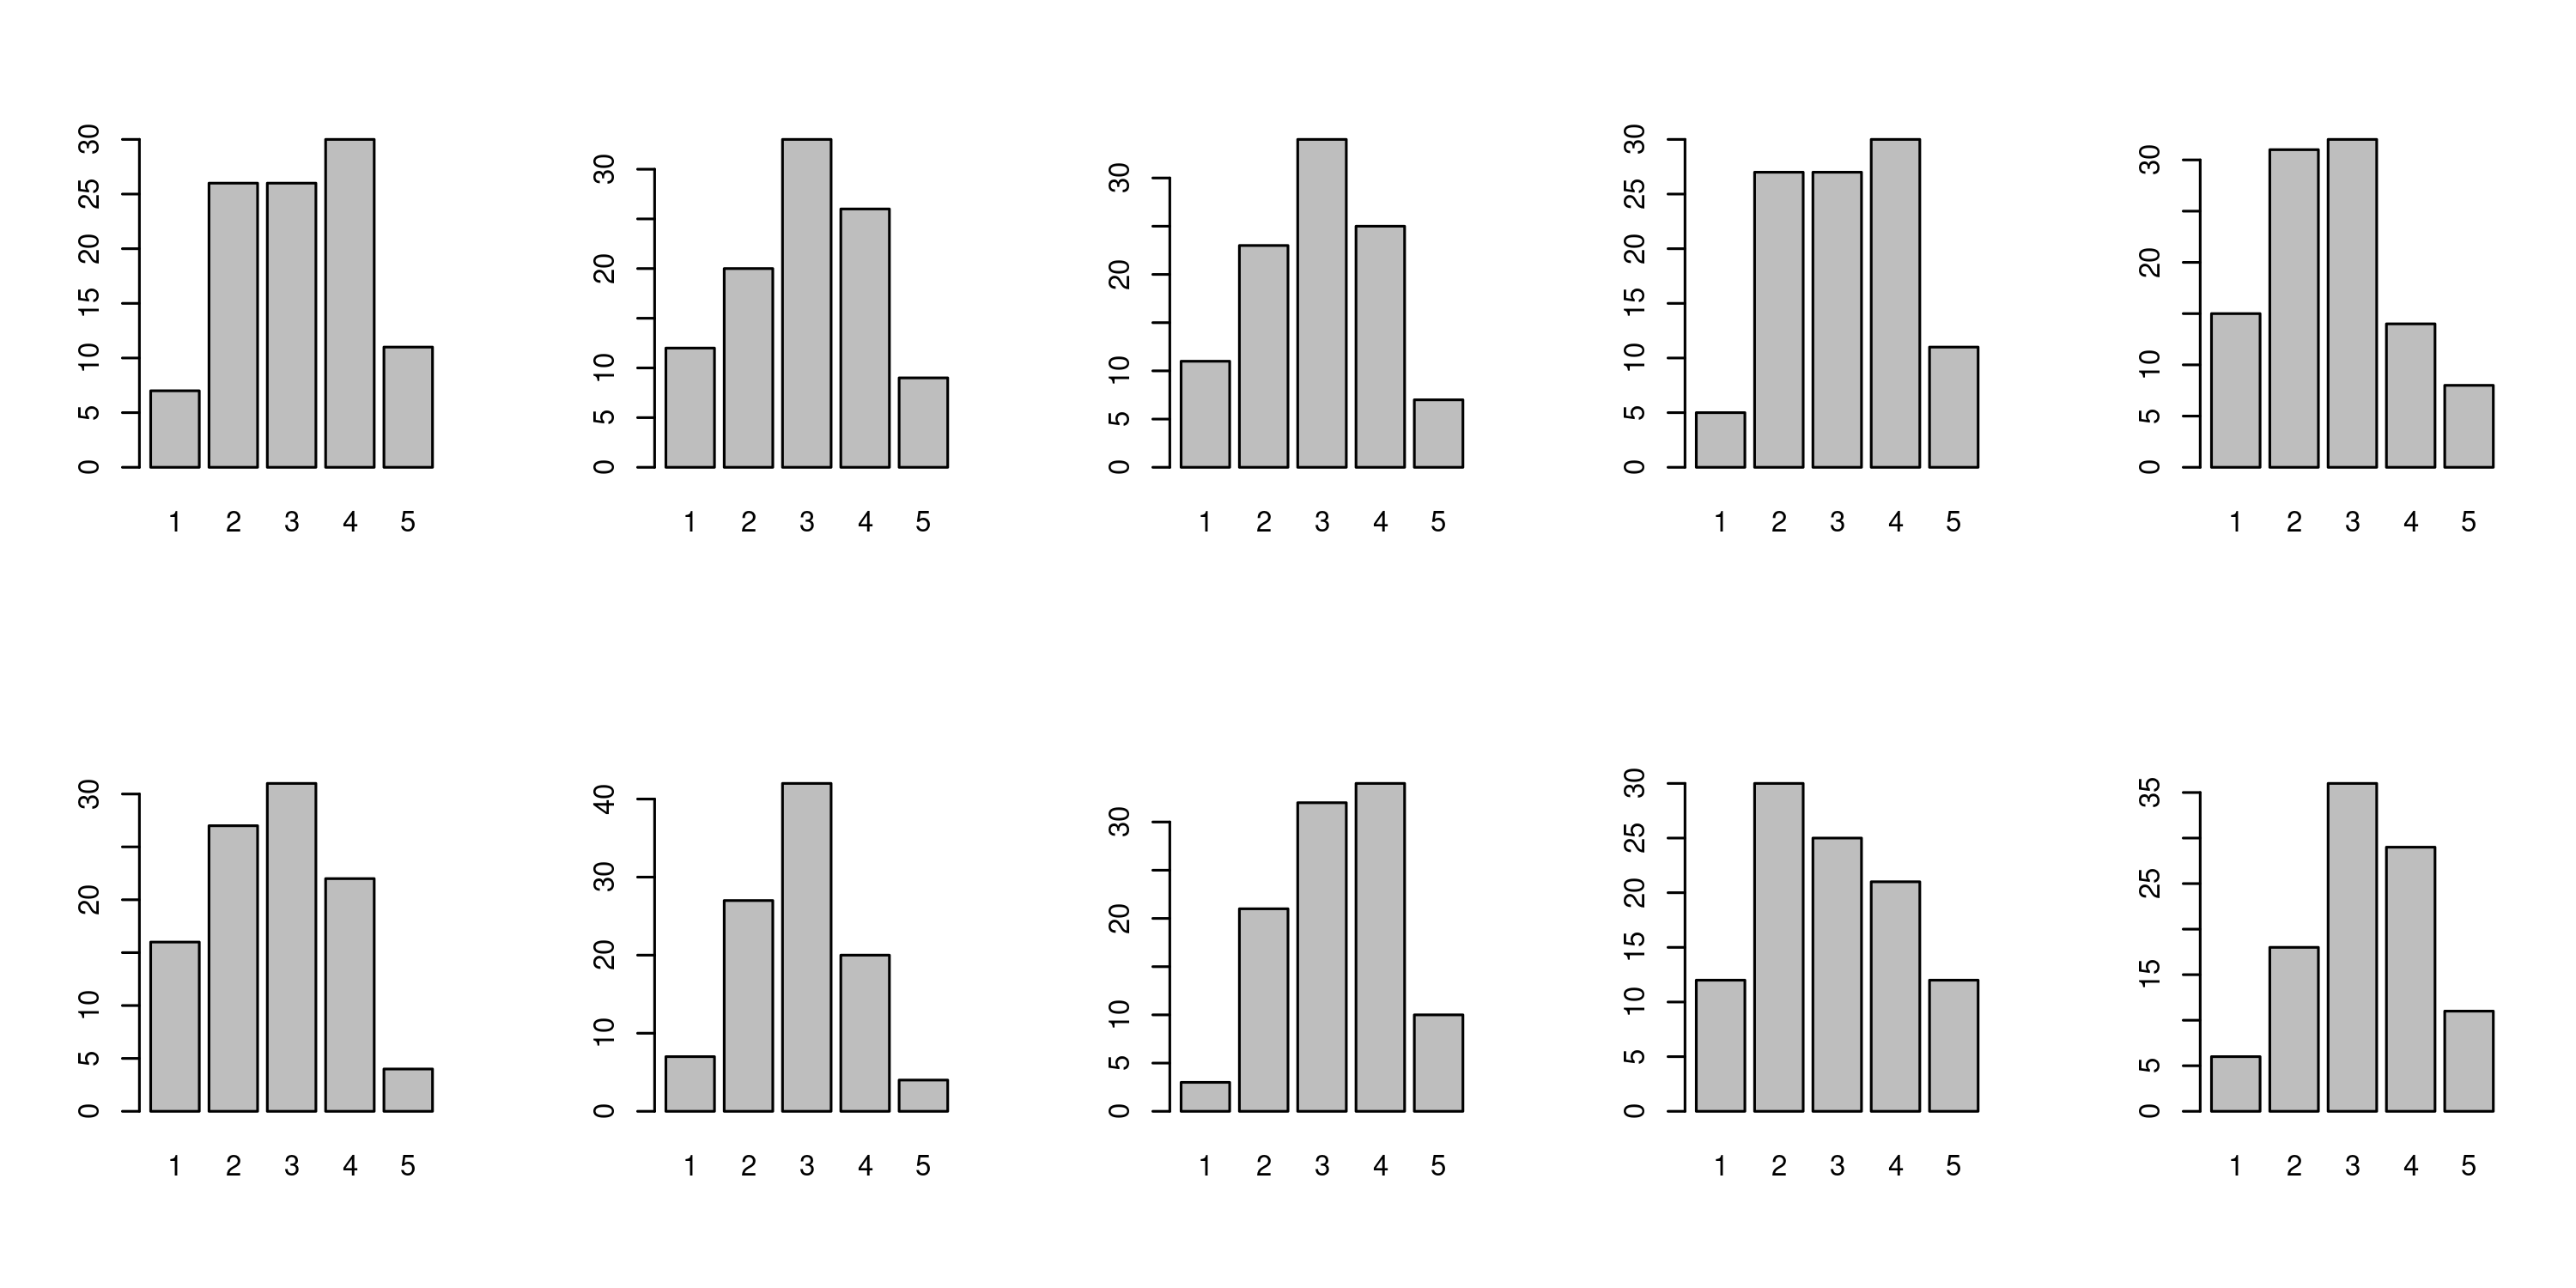

In [5]:
par(mfrow=c(2, 5))
for(i in 1:10) {
    barplot(table(responses[, i]))
}

By default, function `rLikert` generates symmetrically distributed responses 5-point likert scale from standard normal distribution. By default, it is using 5-point Likert scale. We can set number of possible responses by setting the "levels" parameter; e.g. `levels = 10` for 10-point Likert scale.

By increasing the sample size (and number of levels), the sampling distribution converges to a normal distribution. We can observe this by increasing the sample size to a million and levels to 100 (number of items = 1 by default):

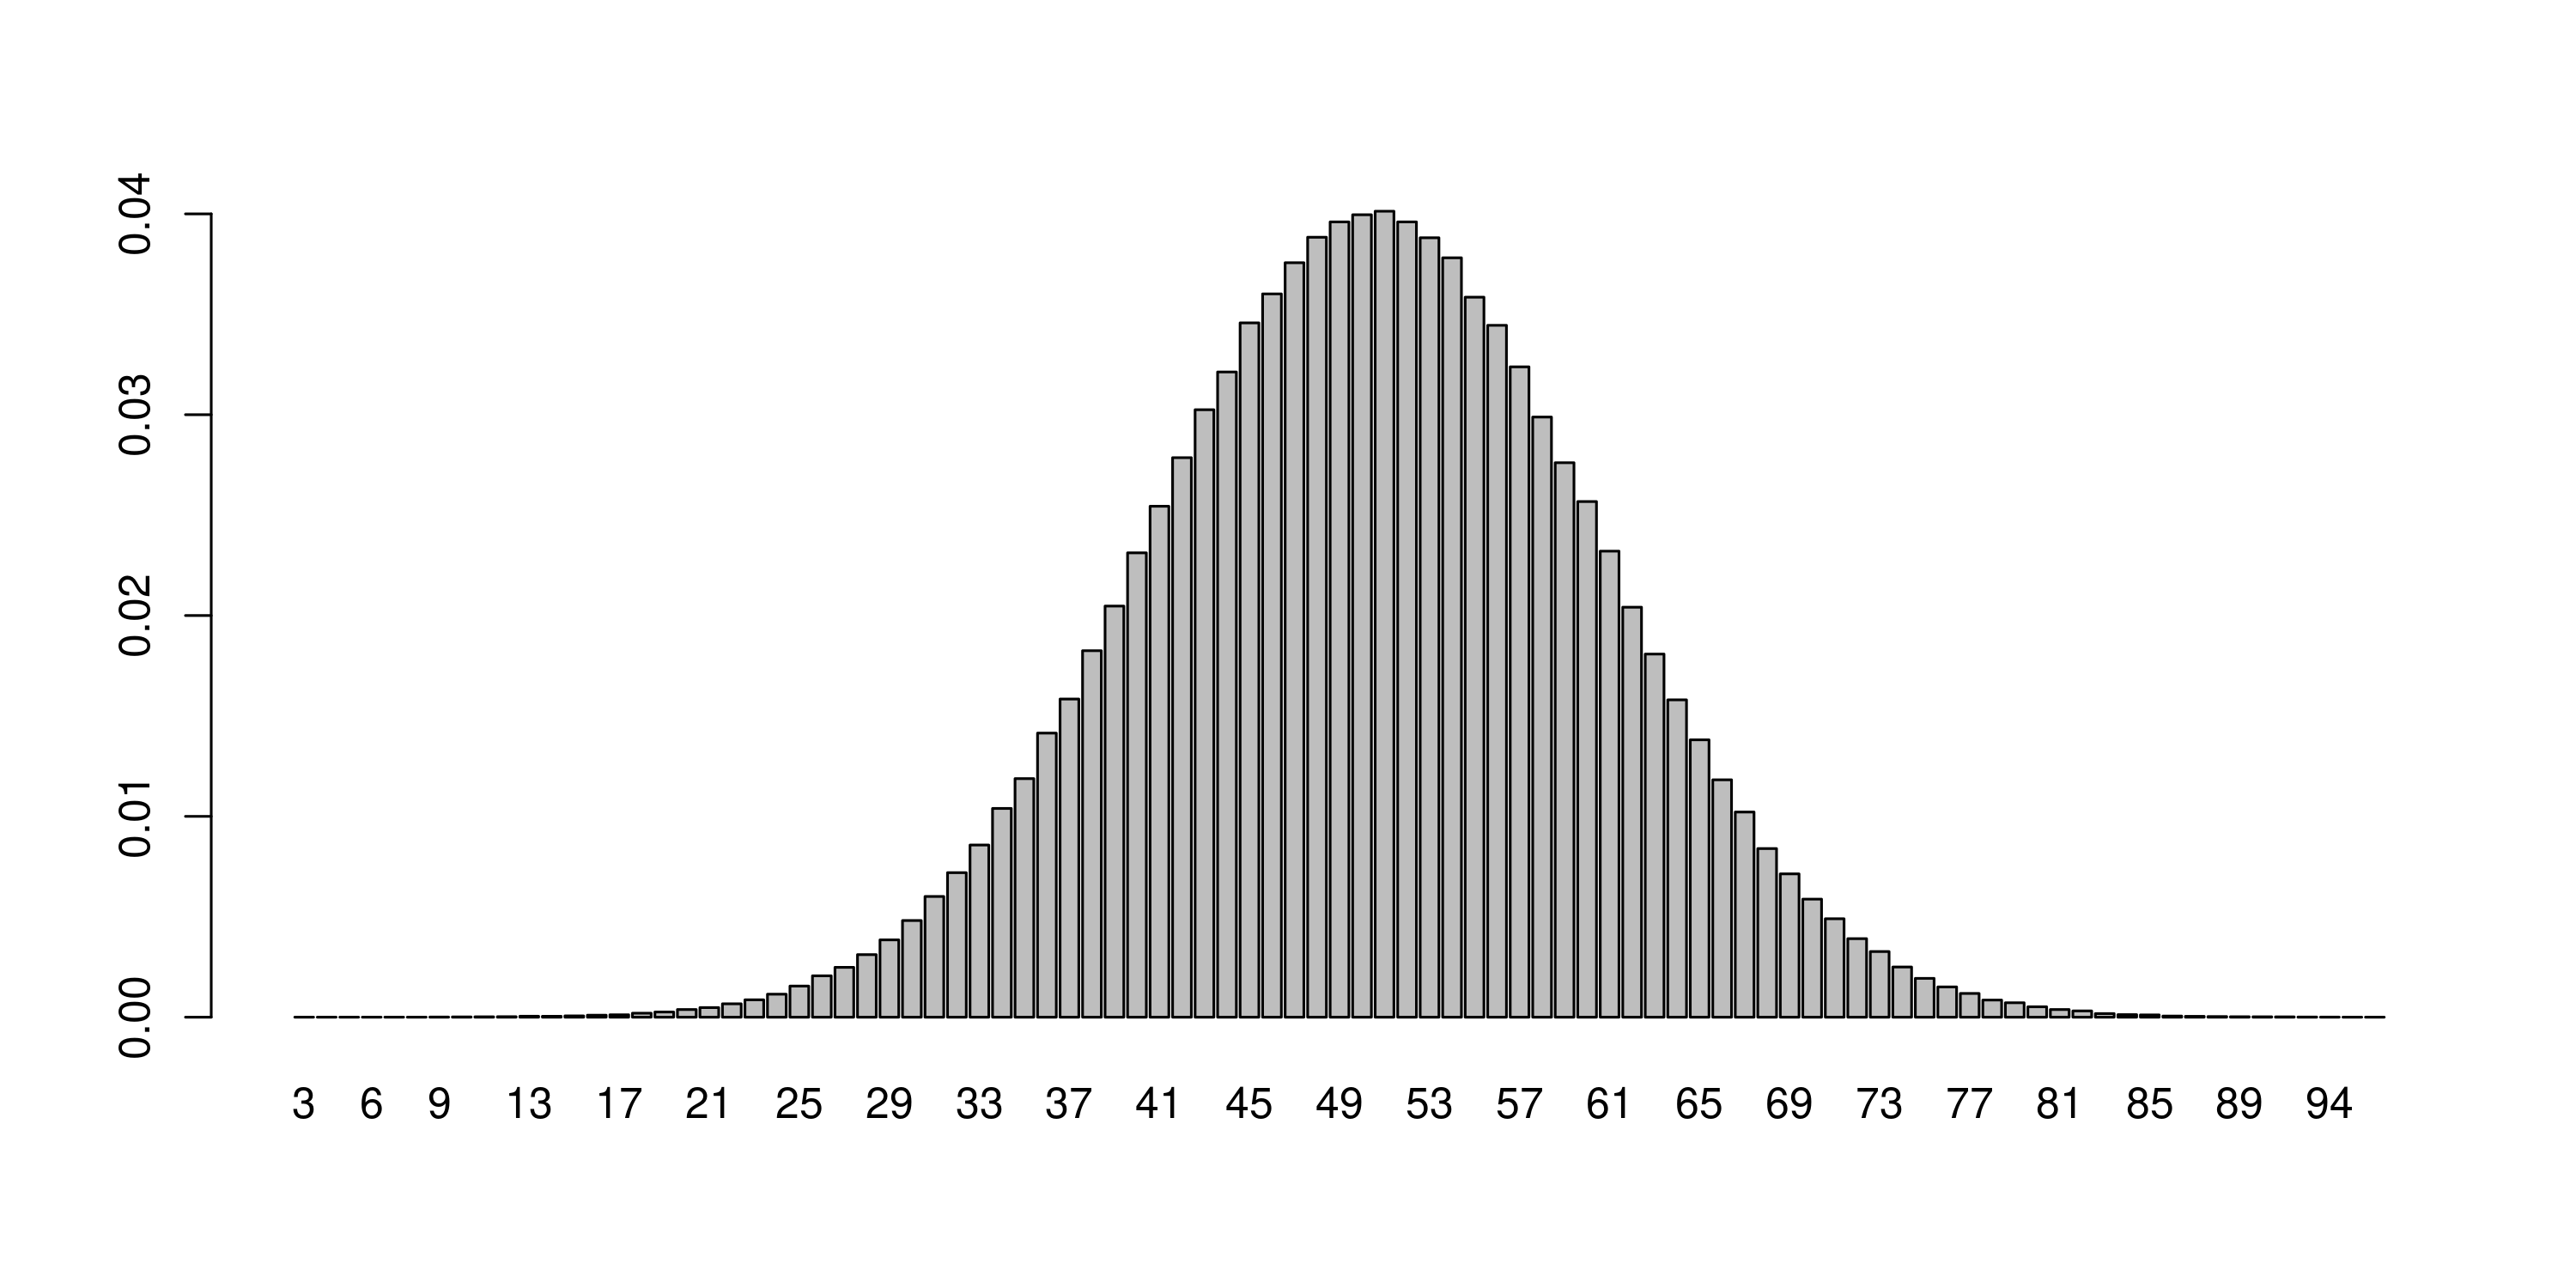

In [6]:
responses <- rLikert(size = 10^6, levels = 100)
barplot(table(responses)/10^6)

## Simulate response bias

To simulate asymmetrically distributed responses we can: 

* Shift the distribution by using the `location` parameter.
* Change the variability or spread by using the `scale` parameter.
* Introduce asymmetry or skewness by using the `shape` parameter.

More specifically, to simulate some properties of our hypothetical survey respondents, we can try to achieve for example that they:

* More strongly agree with some statement: by increasing `location` parameter.
* Survey respondents provide common or typical answers: by decreasing `scale` parameter.
* Survey respondents prefer the right side: by decreasing `shape` parameter.

In [7]:
responses <- rLikert(size=100, items=10, 
                     location=0.3, scale=0.8, shape=-5)

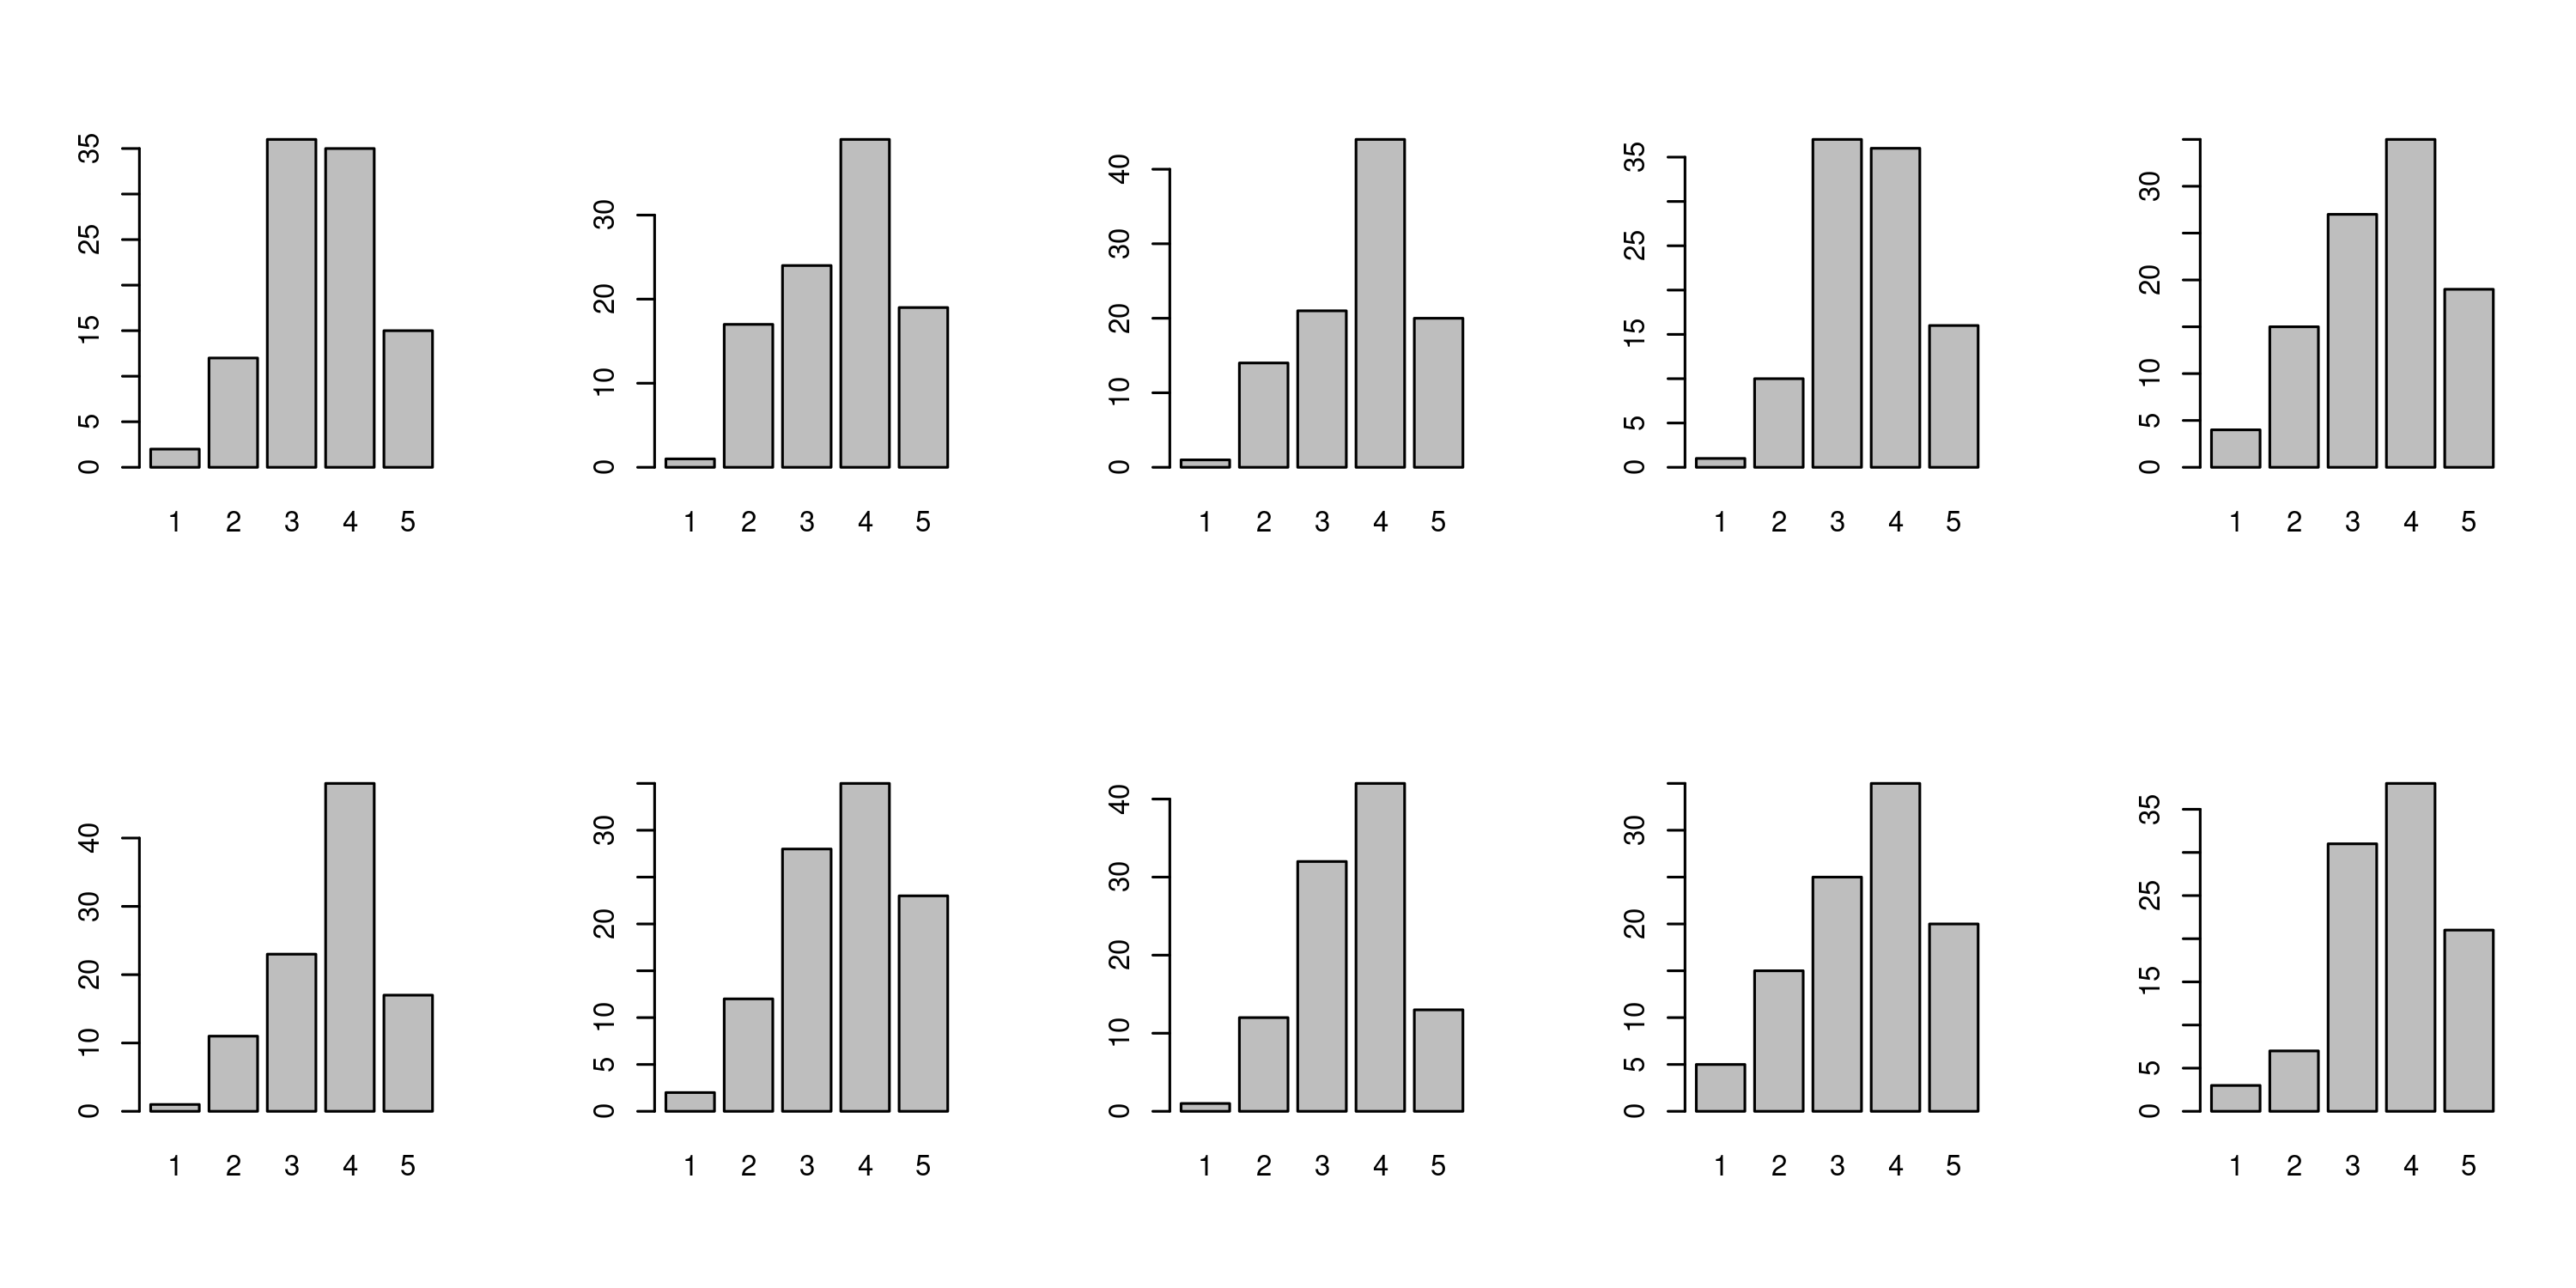

In [8]:
par(mfrow=c(2, 5))
for(i in 1:10) {
    barplot(table(responses[, i]))
}

By increasing the sample size (and number of levels), the sampling distribution converges to a skew normal distribution. We can observe this by increasing the sample size to a million and levels to 100 (number of items = 1 by default):

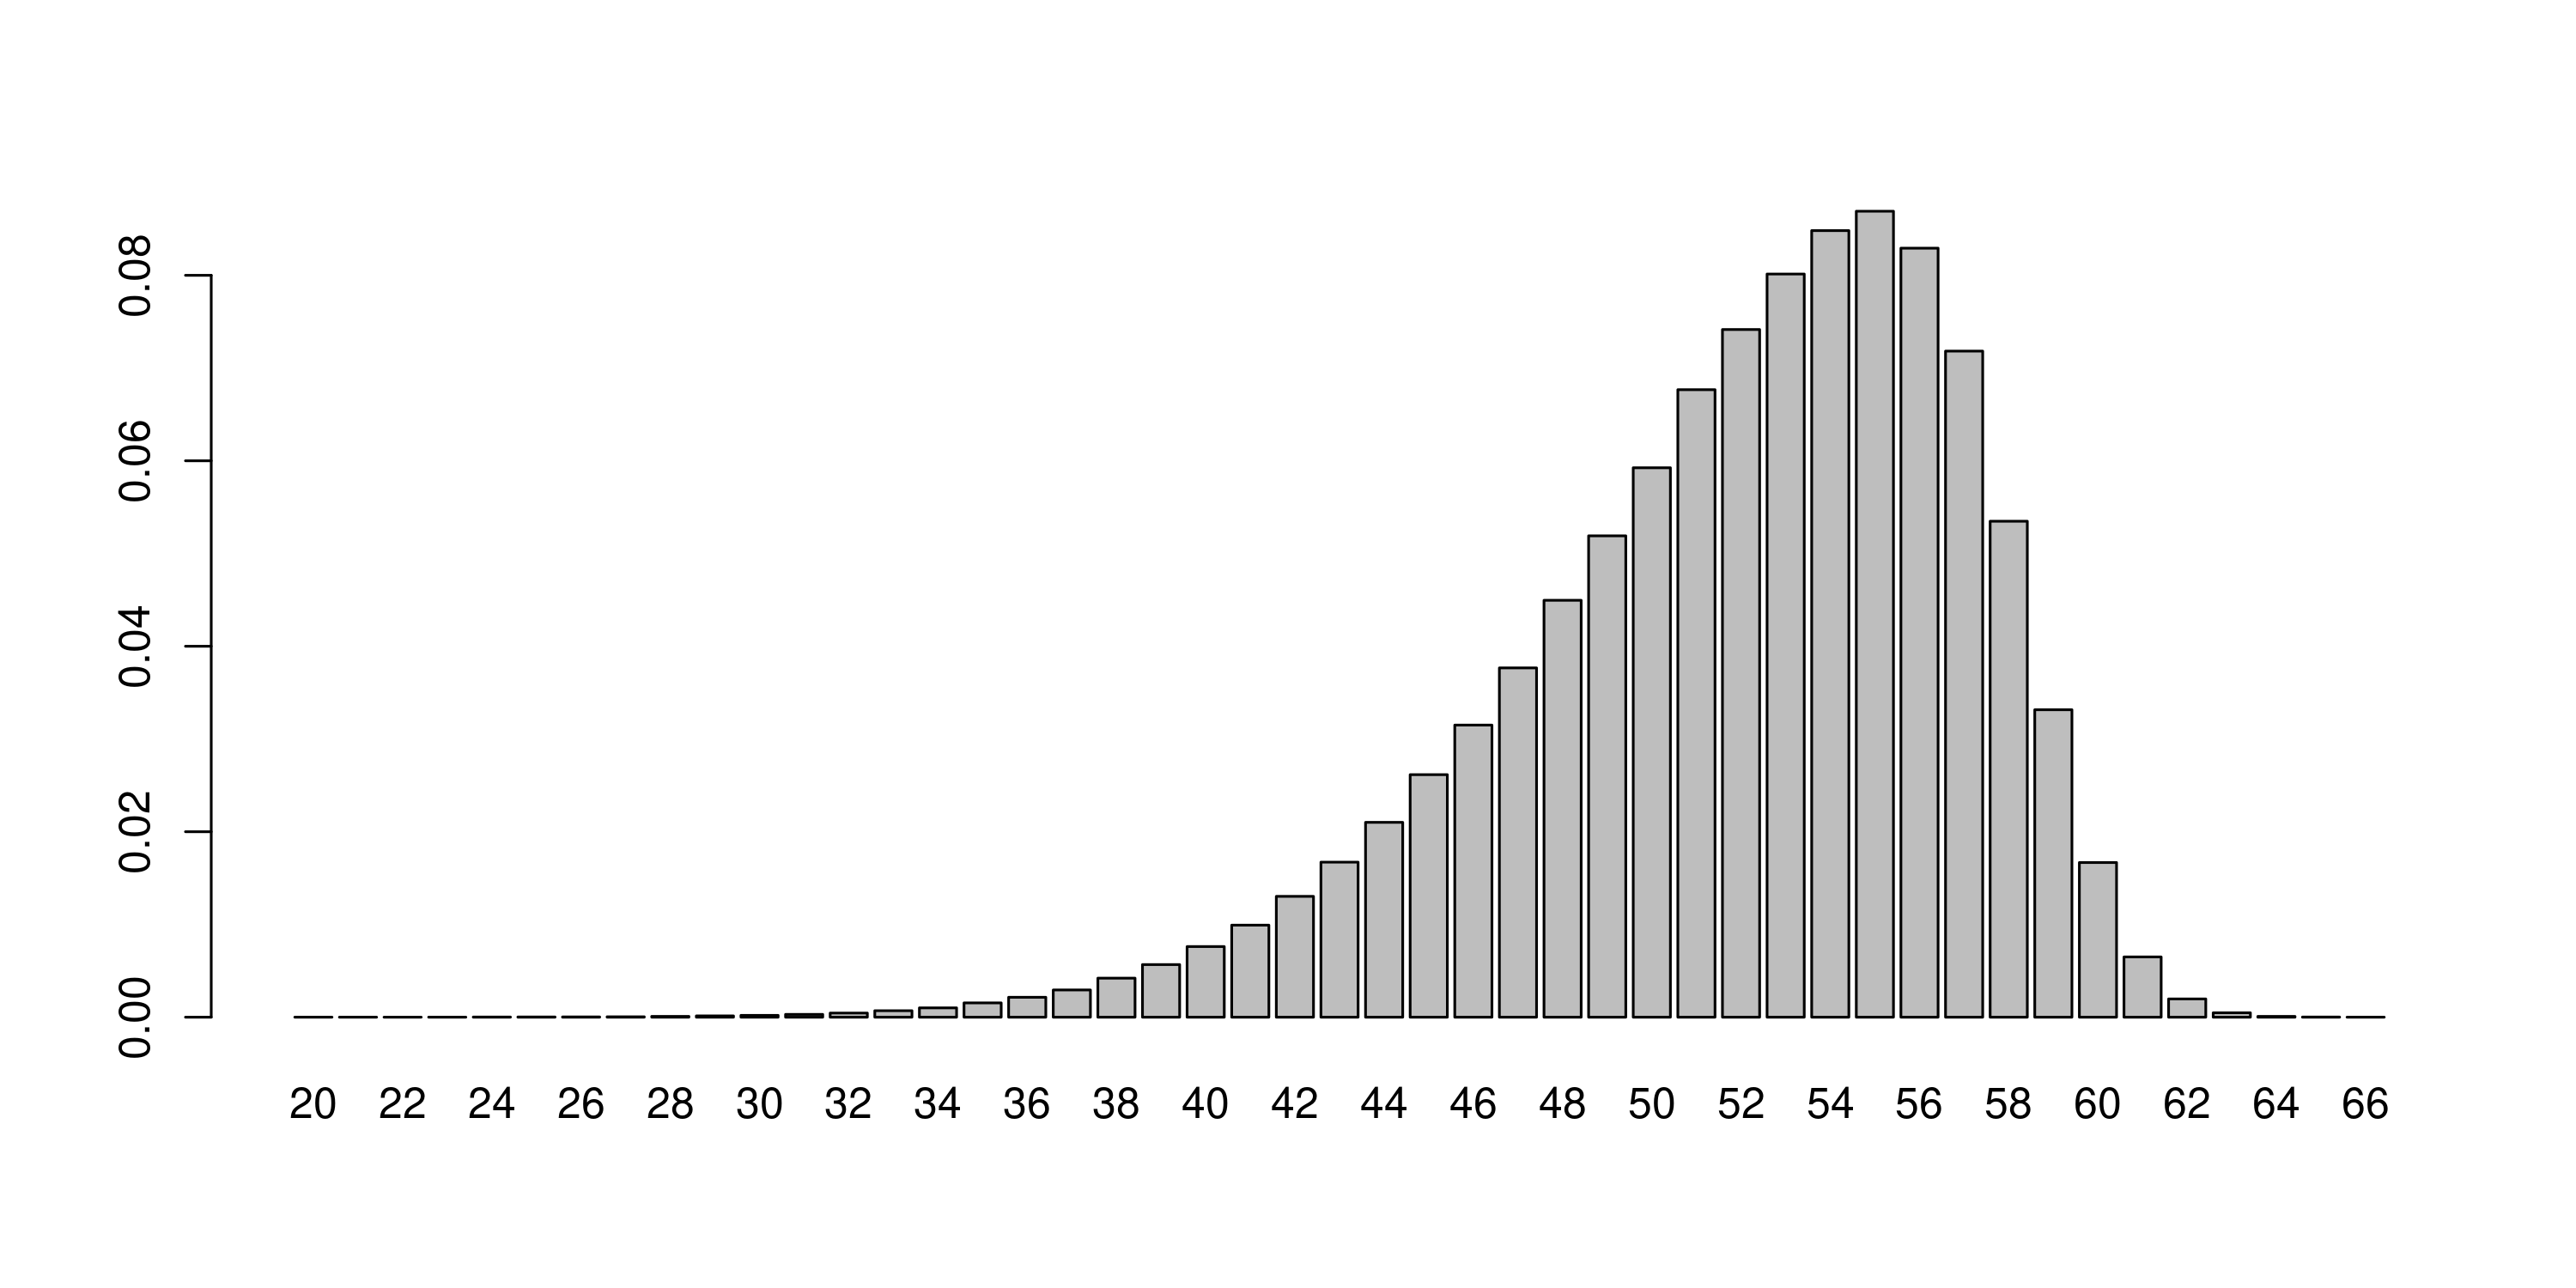

In [9]:
responses <- rLikert(size = 10^6, levels = 100,
                     location=0.3, scale=0.8, shape=-5)
barplot(table(responses)/10^6)